# OpenCV
supports reading of images in most file formats, such as JPEG, PNG, and TIFF. Most image and video analysis requires converting images into grayscale first

In [1]:
import cv2 as cv
# We'll load the floyd.jpg image
img = cv.imread('Person_in_mountain.jpg')
# And we'll convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [2]:
import inspect
inspect.getmro(type(gray))

(numpy.ndarray, object)

type ndarray, which is a fundamental list type coming from the numericalpython project.
OpenCV, however, wants to represent an image as a two dimensional sequence of bytes, and the ndarray, which stands for n dimensional array, is the ideal way to do this.


In [3]:
print(gray)

[[247 249 246 ...  77  78  76]
 [249 251 248 ...  75  75  76]
 [248 251 250 ...  75  75  76]
 ...
 [  1   3   7 ...  11  10   9]
 [  5   5   6 ...  10   8   7]
 [  7   6   5 ...   7   5   6]]


we cannot display it, we need to convert it.

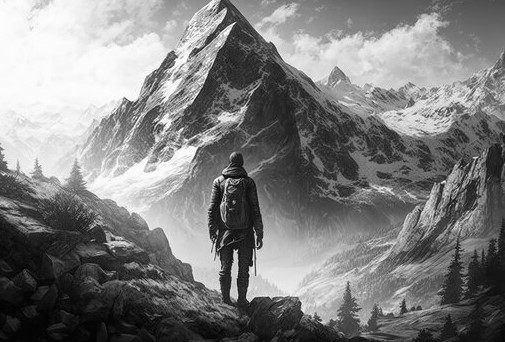

505


In [12]:
from PIL import Image

# PIL can take an array of data with a given color format and convert this into a PIL object.
# This is perfect for our situation, as the PIL color mode, "L" is just an array of luminance
# values in unsigned integers
image = Image.fromarray(gray, "L")
display(image)
# Lets take a look at the shape of our initial image which we loaded into the img variable
img.shape
#image.shape will result in error
#The shape attribute is specific to NumPy arrays, not PIL Image objects.
#When you convert an image to a grayscale mode using Image.fromarray(gray, "L"), the resulting object is an instance of the Image class from PIL or Pillow, not a NumPy array.
# As a result, you cannot use image.shape to get the shape of the image.
width, height = image.size
print(width)

(342, 505, 3) specifically indicates that you have a color image with a resolution of 342 pixels in height, 505 pixels in width, and three color channels (RGB) per pixel.

In [5]:
# Lets talk a bit more about images for a moment. Numpy arrays are multidimensional. For
# instance, we can define an array in a single dimension:
import numpy as np
import PIL
from PIL import Image
single_dim = np.array([25, 50 , 25, 10, 10])

# In an image, this is analagous to a single row of 5 pixels each in grayscale. But actually,
# all imaging libraries tend to expect at least two dimensions, a width and a height, and to
# show a matrix. So if we put the single_dim inside of another array, this would be a two
# dimensional array with element in the height direction, and five in the width direction
double_dim = np.array([single_dim])

double_dim

array([[25, 50, 25, 10, 10]])

In [6]:
# This should look pretty familiar, it's a lot like a list of lists! Lets see what this new
# two dimensional array looks like if we display it
display(Image.fromarray(double_dim, "L"))

In [7]:
#The shape attribute returns a tuple that shows the height of the image, by the width of the image
double_dim.shape

(1, 5)

In [8]:
first_pixel=img[0][0]
first_pixel

array([228, 249, 250], dtype=uint8)

Red channel: 228

Green channel: 249

Blue channel: 250

Each channel value typically ranges from 0 to 255, where 0 represents no intensity (absence of the color) and 255 represents full intensity (maximum presence of the color).

In [13]:
# If we wanted to represent that as a one dimensional image, we just call reshape
print("New image")
# And reshape takes the image as the first parameter, and a new shape as the second
image1d=np.reshape(gray,(1,gray.shape[0]*gray.shape[1]))
print(image1d)

New image
[[247 249 246 ...   7   5   6]]


The reshape function in NumPy is used to change the dimensions of an array, and in this context, it is used to transform a 2D image (2D NumPy array) into a 1D array.

The usage of reshaping an image to 1D can serve several purposes:

1-Flattening the Image: Reshaping to 1D effectively flattens the 2D image into a single row, where all the pixel values are concatenated together. This can be useful for certain machine learning algorithms that require 1D feature vectors as input.

2-Simplification: Working with a 1D representation can simplify certain operations or computations, especially when you don't need to consider the spatial structure of the image.

3-Visualization: While not commonly used for visualization, reshaping to 1D can be useful in specific scenarios where you want to visualize the pixel values as a simple line plot or histogram.

Regarding showing a 1D image as a 2D image, it's not straightforward to visually represent a 1D image as an image since it has lost the spatial information. However, you can potentially reshape the 1D image back to its original 2D shape to visualize it again. To do this, you need to know the original dimensions of the image (height and width) before it was flattened.

Assuming you have the original height and width stored in variables height and width, you can reshape the 1D array back to its 2D representation using NumPy's reshape function:


Copy code
Assuming you have already reshaped 'gray' to 'image1d' as in your code

'Reshape back to the original 2D image'

reshaped_image = image1d.reshape(height, width)

' Now you can visualize 'reshaped_image' as a 2D image'

Keep in mind that to visualize the image properly, you should use a plotting library like Matplotlib to display the image. The reshaped image should now be back in a format that represents the original 2D image, and you can use standard image visualization techniques to display it.

In [6]:
import cv2 as cv
import numpy as np
# We'll load the 2 column image
img = cv.imread('Person_in_mountain.jpg')
# And we'll convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray[2:4,1:3]

array([[251, 250],
       [250, 252]], dtype=uint8)

In [7]:
np.count_nonzero(gray[2:4,1:3])
#count_nonzero(), which just returns the number of entries in the matrix which are not zero.


4

In [9]:
import PIL
from PIL import Image
white_matrix=np.full((12,12),255,dtype=np.uint8)
display(Image.fromarray(white_matrix,"L"))
white_matrix

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [10]:
#But if we want, we can easily color a column to be black
white_matrix[:,6]=np.full((1,12),0,dtype=np.uint8)
#np.full((1, 12), 0, dtype=np.uint8): This function creates a new array with the specified shape, and fills it with the given constant value (in this case, 0).
#The shape of the array is specified as (1, 12), meaning it has 1 row and 12 columns.
#dtype=np.uint8: This part specifies the data type of the array elements. In this case, it's np.uint8, which stands for an unsigned 8-bit integer.
# uint8 data type represents values from 0 to 255 (2^8 - 1), making it suitable for storing pixel values in images.
display(Image.fromarray(white_matrix,"L"))
white_matrix

array([[255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255,   0, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [ ]:
#The OpenCV library contains mechanisms to do face detection onimages. The technique used is based on Haar cascades, which is a machine learning approach.
# OpenCV comes with trained models for detecting faces, eyes, and smiles which we'll be using.You can train models for detecting other things
# https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html

In [5]:
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

In [8]:

img = cv.imread('istockphoto-1368965646-612x612.jpg')
# convert it to grayscale using the cvtColor image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# The next step is to use the face_cascade classifier. the norm is to use the detectMultiScale() function. This function returns
# a list of objects as rectangles. The first parameter is an ndarray of the image.
faces = face_cascade.detectMultiScale(gray)
# And lets just print those faces out to the screen
faces
print(type(faces))

<class 'numpy.ndarray'>


In [7]:
faces.tolist()[0]

[401, 57, 96, 96]

The resulting rectangles are in the format of (x,y,w,h) where x and y denote the upperleft hand point for the image and the width and height represent the bounding box

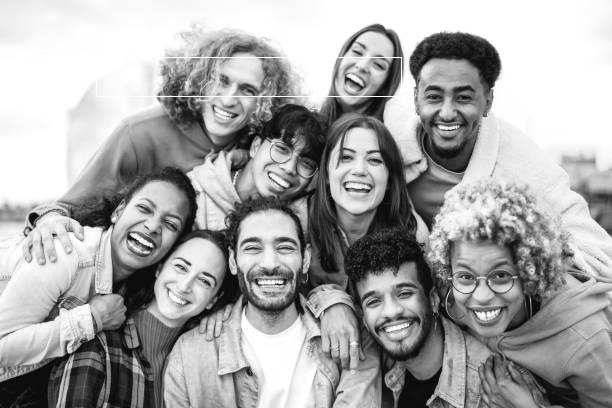

In [9]:
from PIL import Image

# Lets create a PIL image object
pil_img=Image.fromarray(gray,mode="L")

# Now lets bring in our drawing object
from PIL import ImageDraw
# And lets create our drawing context
drawing=ImageDraw.Draw(pil_img)

# Now lets pull the rectangle out of the faces object
rec=faces.tolist()[0]

# Now we just draw a rectangle around the bounds
drawing.rectangle(rec, outline="white")

# And display
display(pil_img)

**bold OpenCV is return the coordinates as (x,y,w,h), while PIL.ImageDraw is looking for (x1,y1,x2,y2).**

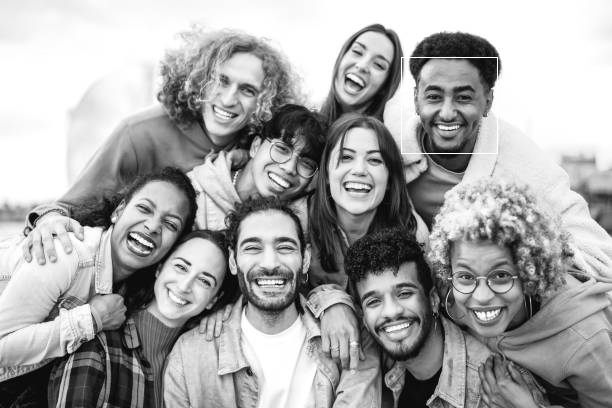

In [10]:
pil_img=Image.fromarray(gray,mode="L")
# Setup our drawing context
drawing=ImageDraw.Draw(pil_img)
# And draw the new box
drawing.rectangle((rec[0],rec[1],rec[0]+rec[2],rec[1]+rec[3]), outline="white")
# And display
display(pil_img)

While working with OpenCV please not that, OpenCV can't work with Gif images.we can just open this in PIL and then save it as a png, then open that in open cv.
pil_img=Image.open('readonly/msi_recruitment.gif')

now lets convert it to greyscale for opencv, and get the bytestream

open_cv_version=pil_img.convert("L")

now lets just write that to a file

open_cv_version.save("msi_recruitment.png")

 when working and converting gif we encounter some problem it is due to its color limitations for gif images. In short, a gif image has a very limited number of colors. This is called a color pallette after the pallette artists
use to mix paints. For gifs the pallette can only be 256 colors -- but they can be *any*256 colors. When a new color is introduced, is has to take the space of an old color.In this case, PIL adds white to the pallette but doesn't know which color to replace andthus messes up the image.

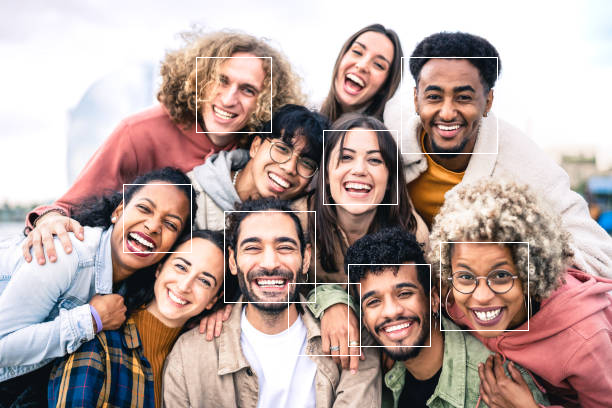

In [13]:
cv_img = cv.imread('istockphoto-1368965646-612x612.jpg')
faces = face_cascade.detectMultiScale(cv_img)

# Now, we still have our PIL color version in a gif
pil_img=Image.open('istockphoto-1368965646-612x612.jpg')
# Set our drawing context
drawing=ImageDraw.Draw(pil_img)

# For each item in faces, lets surround it with a red box
for x,y,w,h in faces:
    # That might be new syntax for you! Recall that faces is a list of rectangles in (x,y,w,h)
    # format, that is, a list of lists. Instead of having to do an iteration and then manually
    # pull out each item, we can use tuple unpacking to pull out individual items in the sublist
    # directly to variables. A really nice python feature
    #
    # Now we just need to draw our box
    drawing.rectangle((x,y,x+w,y+h), outline="white")
display(pil_img)

In [14]:
# which will plot rectanges for us over the image
def show_rects(faces):
    #Lets read in our gif and convert it
    pil_img=Image.open('istockphoto-1368965646-612x612.jpg').convert("RGB")
    # Set our drawing context
    drawing=ImageDraw.Draw(pil_img)
    # And plot all of the rectangles in faces
    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="white")
    #Finally lets display this
    display(pil_img)

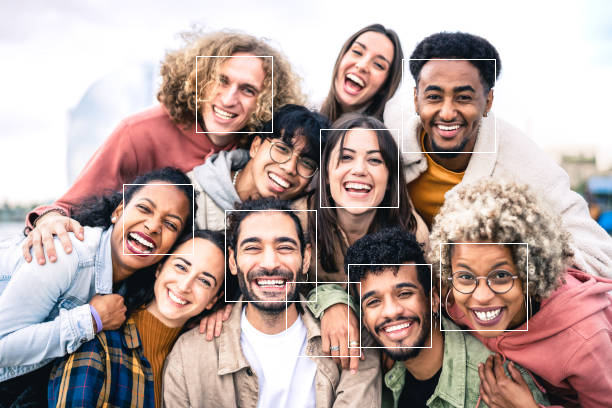

[[196  56  76  76]
 [402  59  93  93]
 [320 129  78  78]
 [123 184  70  70]
 [225 210  91  91]
 [286 282  74  74]
 [440 243  87  87]
 [348 264  83  83]]


In [19]:
cv_img_bin=cv.threshold(img,120,255,cv.THRESH_BINARY)[1] # returns a list, we want the second value
# Now do the actual face detection
faces = face_cascade.detectMultiScale(cv_img_bin)
# Now lets see the results
show_rects(faces)
print(faces)

cv.threshold(): This is a function in OpenCV used to threshold an image. Thresholding is a technique to convert a grayscale image into a binary image, where each pixel is either completely black (0) or completely white (255) based on a threshold value.

img: This is the input image you want to threshold. It should be a grayscale image (single-channel) for this specific thresholding function.

120: This is the threshold value. It is a number between 0 and 255. Pixels with intensity values less than or equal to 120 will be set to 0 (black), and pixels with intensity values greater than 120 will be set to 255 (white).

255: This is the maximum value used for the binary output image. Pixels that meet the threshold condition will be set to this value (white).

cv.THRESH_BINARY: This is the type of thresholding method used. In this case, it's a binary thresholding, where pixels are set to either 0 or 255 based on the threshold value.

cv.threshold(img, 120, 255, cv.THRESH_BINARY): This part of the code applies the thresholding operation to the input image img using the specified parameters.

[1]: This part of the code extracts the second element from the output tuple returned by

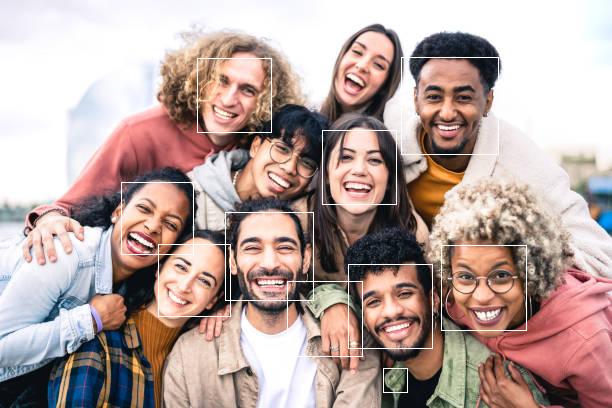

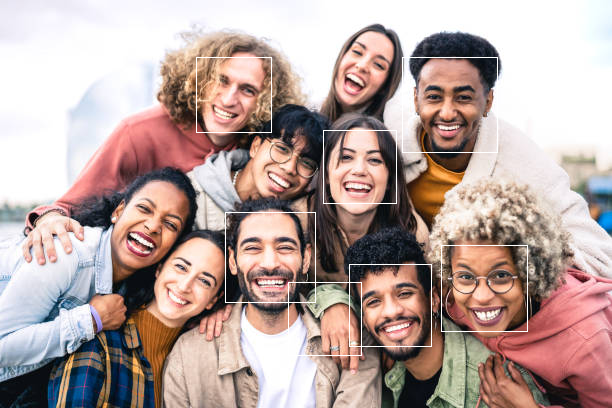

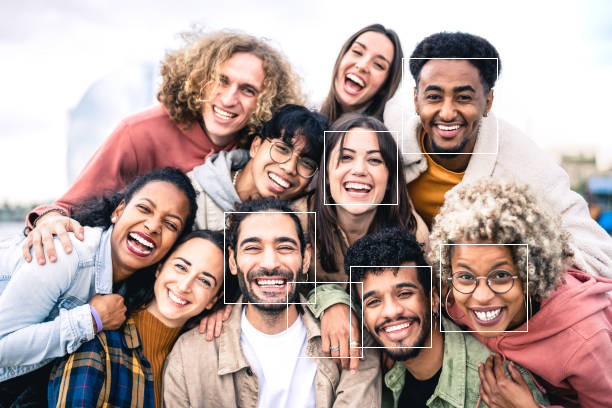

In [16]:
faces = face_cascade.detectMultiScale(cv_img,1.05)
# Show those results
show_rects(faces)
# Now lets also try 1.15
faces = face_cascade.detectMultiScale(cv_img,1.15)
# Show those results
show_rects(faces)
# Finally lets also try 1.25
faces = face_cascade.detectMultiScale(cv_img,1.25)
# Show those results
show_rects(faces)

as we raise the number we are loosing more detection but we gain more speed


Jupyter has nice support for timing commands. You might have seen this before, a line that starts with a percentage sign in jupyter is called a "magic function". This isn'tnormal python - it's actually a shorthand way of writing a function which Jupyter has predefined. It looks a lot like the decorators we talked about in a previouslecture, but the magic functions were around long before decorators were part of the python language. One of the built-in magic functions in juptyer is called timeit, and this repeats a piece of python ten times (by default) and tells you the average speed it took to complete.

In [17]:
# Ok, now lets compare that to the speed at scale = 1.15
%timeit face_cascade.detectMultiScale(cv_img,1.15)

189 ms ± 47.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
# Lets time the speed of detectmultiscale when using a scale of 1.05
%timeit face_cascade.detectMultiScale(cv_img,1.05)

435 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


rich set of contributed plugins that seek to extend this system. In this  ipy web rtc. Webrtc is a fairly new protocol for real time communication on the web,
The widget brings this to the Jupyter notebook system. Lets take a look. First, lets import from this library two different classes which we'll use in a
 demo, one for the camera and one for images.

#ipywebrtc

In [21]:
!pip install ipywebrtc
!pip install opencv-python
!pip install numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 4.0 MB/s eta 0:00:00


In [22]:
from ipywebrtc import CameraStream, ImageRecorder
# Then lets take a look at the camera stream object
help(CameraStream)
# CameraStream.facing_user(audio=False)
# CameraStream.facing_environment(audio=False)

Help on class CameraStream in module ipywebrtc.webrtc:

class CameraStream(MediaStream)
 |  CameraStream(*args: Any, **kwargs: Any) -> Any
 |  
 |  Represents a media source by a camera/webcam/microphone using
 |  getUserMedia. See
 |  https://developer.mozilla.org/en-US/docs/Web/API/MediaDevices/getUserMedia
 |  for more detail.
 |  The constraints trait can be set to specify constraints for the camera or
 |  microphone, which is described in the documentation of getUserMedia, such
 |  as in the link above,
 |  Two convenience methods are avaiable to easily get access to the 'front'
 |  and 'back' camera, when present
 |  
 |  >>> CameraStream.facing_user(audio=False)
 |  >>> CameraStream.facing_environment(audio=False)
 |  
 |  Method resolution order:
 |      CameraStream
 |      MediaStream
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets

 get a camera facing the user, and we can have the audio on or off.

In [23]:
camera = CameraStream.facing_user(audio=False)
# The next object we want to look at is the ImageRecorder
help(ImageRecorder)

Help on class ImageRecorder in module ipywebrtc.webrtc:

class ImageRecorder(Recorder)
 |  ImageRecorder(format='png', filename='record', recording=False, autosave=False, **kwargs)
 |  
 |  Creates a recorder which allows to grab an Image from a MediaStream widget.
 |  
 |  Method resolution order:
 |      ImageRecorder
 |      Recorder
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, format='png', filename='record', recording=False, autosave=False, **kwargs)
 |      Public constructor
 |  
 |  save(self, filename=None)
 |      Save the image to a file, if no filename is given it is based on the filename trait and the format.
 |      
 |      >>> recorder = ImageRecorder(filename='test', format='png')
 |      >>> ...
 |      >>> recorder.sa

In [26]:
#The image recorder lets us actually grab images from the camera stream. There are features
# for downloading and using the image as well. We see that the default format is a png file.
# Lets hook up the ImageRecorder to our stream
image_recorder = ImageRecorder(stream=camera)
# Now, the docs are a little unclear how to use this within Jupyter, but if we call the
# download() function it will actually store the results of the camera which is hooked up
# in image_recorder.image. Lets try it out
# First, lets tell the recorder to start capturing data
image_recorder.recording=True
# Now lets download the image
image_recorder.download()
# Then lets inspect the type of the image
type(image_recorder.image)

ipywidgets.widgets.widget_media.Image

In [27]:
# Lets import PIL Image
import PIL.Image
# And lets import io
import io
# And now lets create a PIL image from the bytes
img = PIL.Image.open(io.BytesIO(image_recorder.image.value))
# And render it to the screen
display(img)

UnidentifiedImageError: ignored

In [28]:
import cv2
import numpy as np
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = f"google.colab.kernel.invokeFunction('notebook.runCommand', ['import cv2\\ncap = cv2.VideoCapture(0)\\nret, frame = cap.read()\\ncap.release()\\ncv2.imwrite(\"{filename}\", frame)'])"
    eval_js(js)
    # Read the image file and return the image data as a NumPy array
    with open(filename, 'rb') as f:
        data = b64decode(f.read())
    return np.frombuffer(data, dtype=np.uint8)

# Capture a photo from the webcam
photo = take_photo()


KeyboardInterrupt: ignored